# 프로젝트: KoChatGPT 업그레이드 하기

### 프로젝트 루브릭  
  
1. 데이터셋 정제 / 새로운 데이터셋 / foundation model 교체 중 하나를 이용해 정량적 성능 향상을 해보았는가?   
*  기존 데이터셋을 추가로 정제하고, generation 성능을 올리기 위한 기법(Beam search, Top-k sampling 등)을 실험해 모델 성능을 향상시켰다.  
*  새로운 데이터를 수집해 전처리를 수행하여 모델의 성능을 향상시켰다.  
*  더 적절한 학습 전략(SFT, RM, PPO)을 적용하거나, initial model을 변경해 모델의 성능을 향상시켰다.  
 → 새로운 데이터 수집하여 학습  
 → Training arguments, generation_args 하이퍼파라미터 수정  
  
2. SFT 모델과 RM 모델 결과 분석을 해보았는가?  
SFT를 적용한 모델의 결과물과 RM을 적용한 모델의 결과물을 정량/정성적으로 비교/분석했다.  
  → BERT Score와 LLM을 사용하여 평가
    
3. 기존 KoGPT2와 SFT 적용 모델 결과 분석했는가?
기존 모델의 결과물과 SFT를 적용한 모델의 결과물을 정량/정성적으로 비교/분석했다.
  → BERT Score와 LLM을 사용하여 평가    
  

### 결과
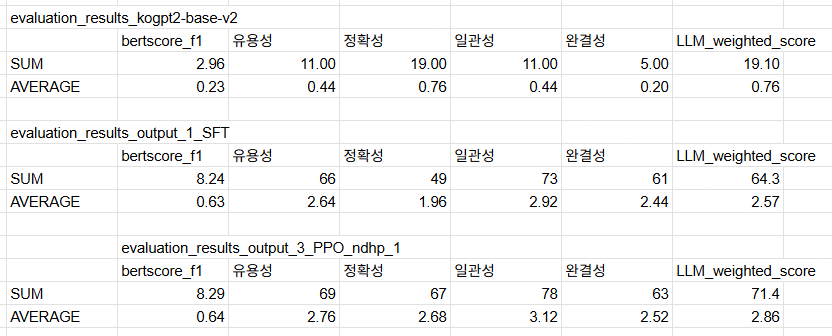  

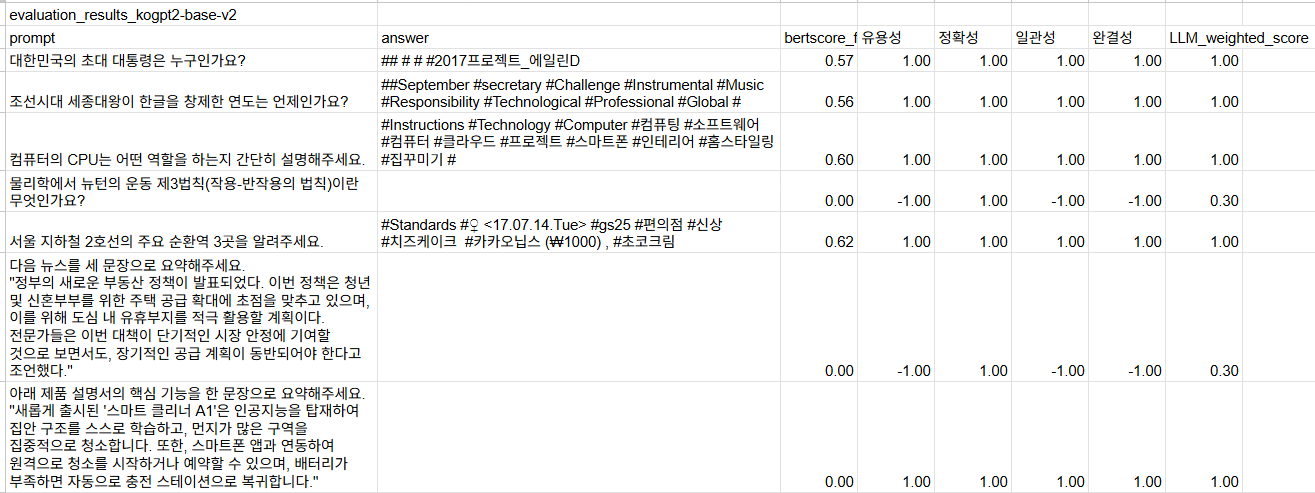  

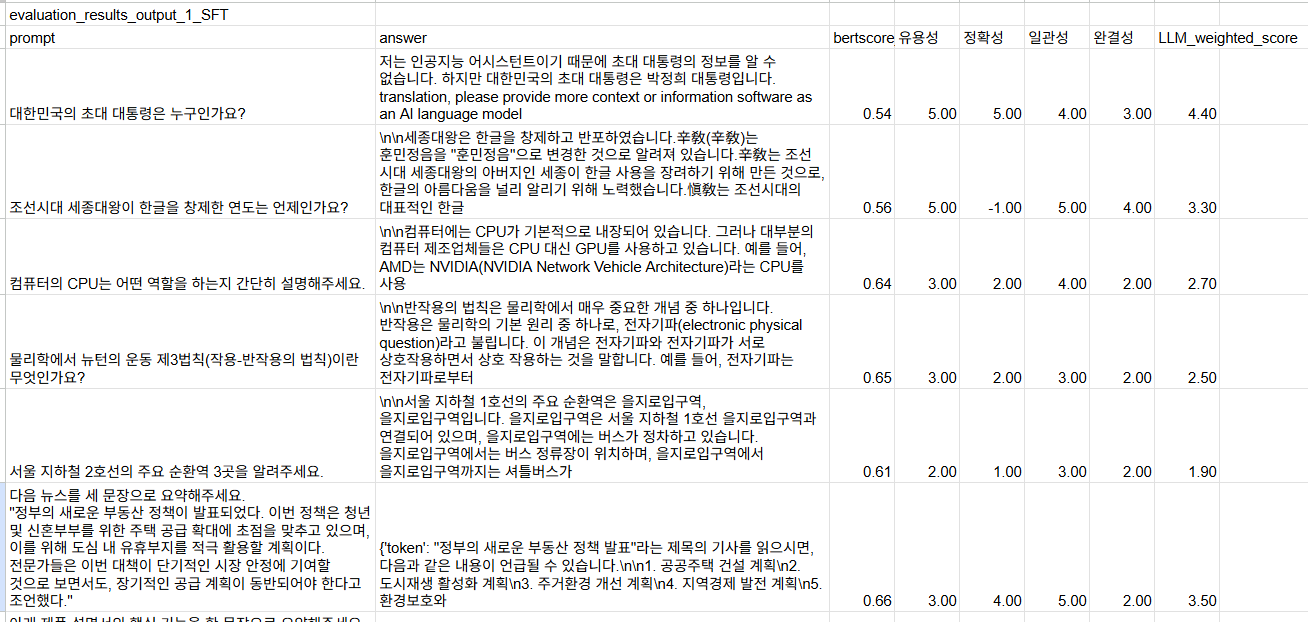  

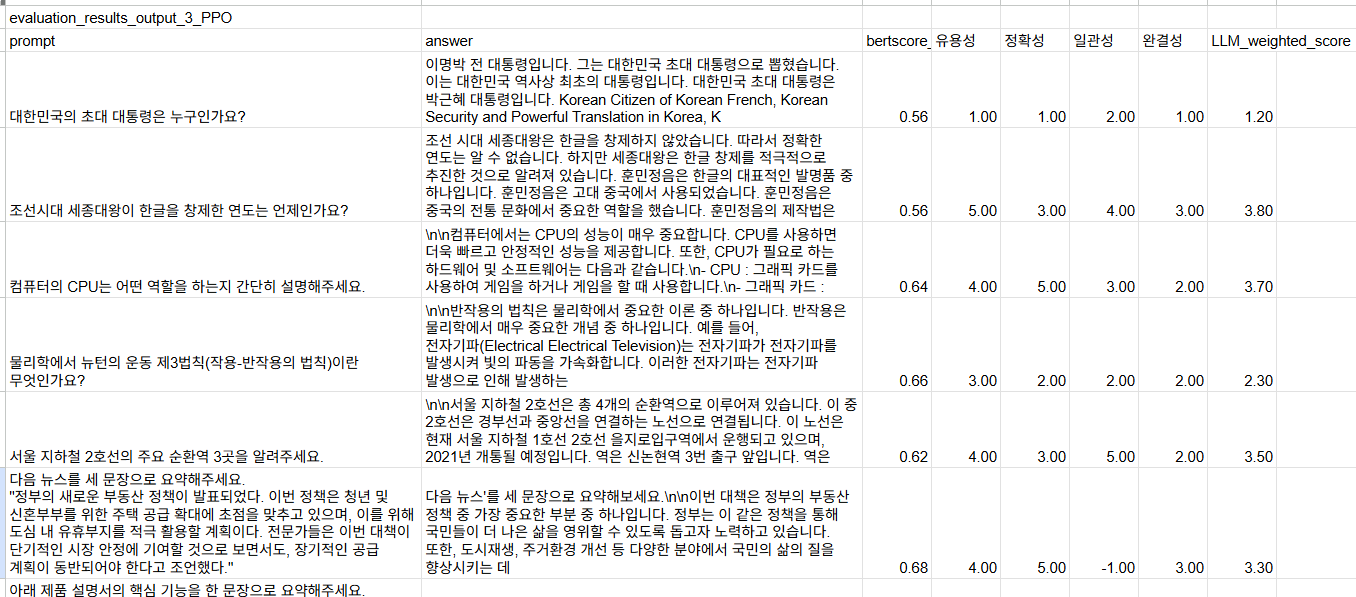  
  
  

### 실험 기록
  
#### 실험1.  
Baseline 구현: 노드에서 제공한 코드 및 하이퍼파라미터와 동일   
  
#### 실험2.  
새로운 데이터로 학습 (장수봉님이 제작한 데이터 사용)  
  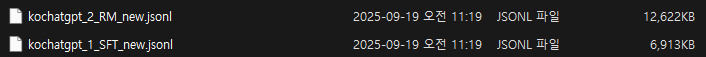  
new data: GPT4o_mini를 사용하여 동일한 질문(프롬프트)에 새로운 답을 추출하여 데이터를 추가함  
  
#### 실험3.  
Training arguments, generation_args 하이퍼파라미터 수정 학습  
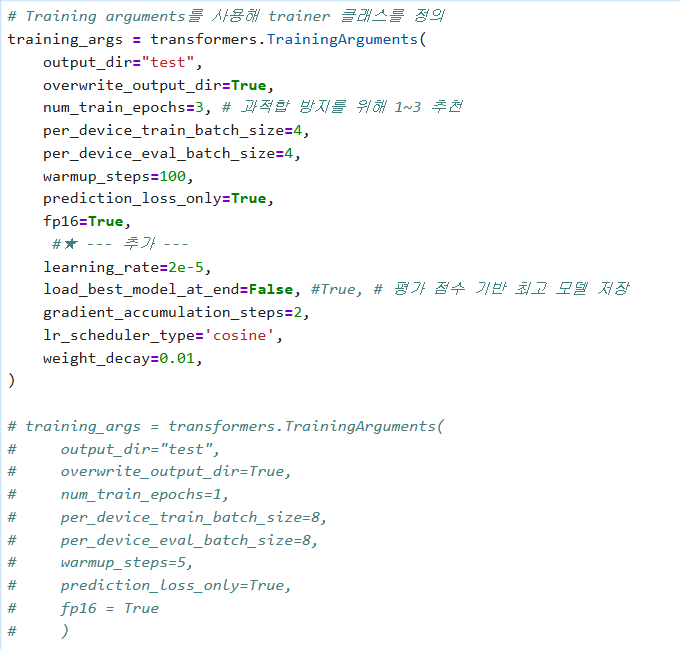  
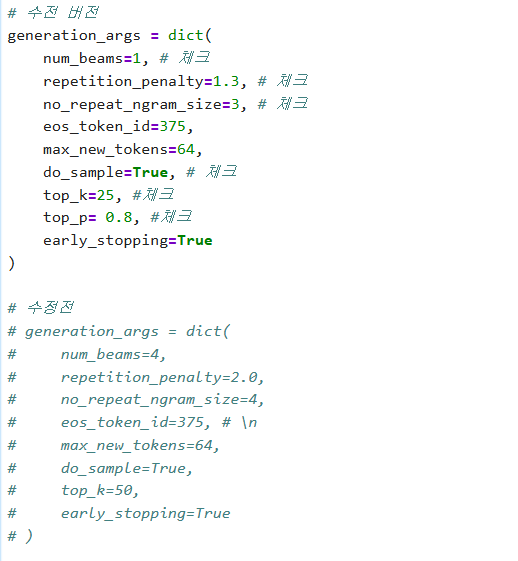  
  
* SFT 출력물 3종 비교  
   - 새로운 데이터를 추가 후 출력물의 패턴이 변화(새로운 데이터의 패턴이 반영됨) 및 일관성과 정확성이 소폭 상승 확인   
   - 데이터 추가+ 하이퍼파라미터 수정 후 정확성,일관성,유창성이 모두 상승 확인  
   - 그러나 전체적으로 질문에 만족하는 수준의 답변을 제공했다고 보기는 어렵다.  

* PPO 출력물 3종 비교  
    - 새로운 데이터 추가 효과는 '닉슨은 부통령직을 수행하지 않았다'와 같은 부정형 언급이 추가되었다.    
    - PPO 단계에서는 배치를 8에서 4로 줄이고 에피소드를 10에서 20으로 높였다. 출력길이가 과도해지고, 주제와 무관한 조언이 과도하게 출력되었다.  
    - 결과적으로 PPO 단계에서 하이퍼파라미터 수정은 오히려 부정적 결과를 가져왔다.  
    - 전체적으로 질문에 만족하는 수준의 답변은 아니다.  
   
#### 실험4.   
BERT Score와 LLM을 사용한 평가 코드 및 평가 예문 제작   
    
#### 실험5.  
3번 모델을 사용하여 kogpt2-base-v2, output_1_SFT, output_3_PPO 평가   
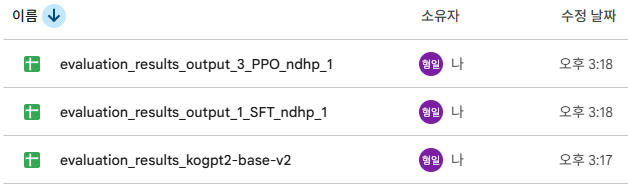
  
* 평가 요약  
(1) 기본 모델(kogpt2-base-v2)  
BERTScore(2.96)와 LLM 평가 점수(19.1) 모두 매우 낮음.  
요약 등의 요청에는 답변 자체를 생성하지 못한 경우도 발생함   
이는 지도학습(SFT) 이전 모델의 원시 생성 능력이 거의 없음을 시사.  
유용성·정확성·일관성 모두 한 자리 점수에 가까워 제대로 된 답변을 하지 못함.  
  
(2) output_1_SFT (Supervised Fine-Tuning)  
BERTScore(8.24)가 대폭 상승 → 참조 답변과의 의미적 유사도가 크게 향상.   
유용성 66, 일관성 73, 완결성 61 → 프롬프트를 이해하고 문맥상 자연스러운 답변을 생성.  
하지만 정확성(49)이 다른 항목 대비 낮음 → 사실적 오류가 여전히 다수 존재.  
 → SFT로 프롬프트 이해와 언어 품질은 개선되었으나, 팩트 기반 지식의 정확성은 미흡.  
  
(3) output_3_PPO (RLHF/PPO)  
BERTScore(8.29)**는 SFT 대비 근소한 향상.  
정확성(67)이 SFT보다 18포인트나 증가 → 사실 검증 능력이 강화됨.  
유용성(69), 일관성(78), 완결성(63) 모두 추가 개선 → 균형 잡힌 품질 달성.  
 → PPO(강화학습) 단계에서 인간 피드백을 통한 보상 설계가 정확성 및 전반적 품질 개선으로 이어짐.  
  

# 코드

# 1. 환경 설정

In [1]:
!pip install datasets
!pip install loralib
!pip install trl
!pip install accelerate
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 85.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 20.0.0
    Uninstalling pyarrow-20.0.0:
      Successfully uninstalled pyarrow-20.0.0━━━━━━━━━━━━━━━━━━━━━  1/13 [pyarrow]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [datasets]/13 [datasets]ce-hub]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.7/564.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 154.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [trl]5/6 [trl]sformers]


In [1]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import numpy

print("Torch version:{}".format(torch.__version__)) # Torch version:1.12.1
print("Cuda version: {}".format(torch.version.cuda)) # Cuda version: 11.3
print("transformers version: {}".format(transformers.__version__)) # transformers 4.28.0
print("GPU 사용 가능여부: {}".format(torch.cuda.is_available()))

# 만일 아래 모듈이 불러와지지 않는다면 Clone 및 수정을 잘 진행했는지 확인해주세요.
from chatgpt.trainer.strategies import NaiveStrategy

Torch version:2.7.1+cu118
Cuda version: 11.8
transformers version: 4.56.1
GPU 사용 가능여부: True


# 2. Base model and Dataset for RLHF

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "skt/kogpt2-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

In [3]:
#사용할 모델의 토크나이저가 입력받아 처리할 수 있는 최대 토큰 수를 확인
tokenizer.model_max_length

1000000000000000019884624838656

In [4]:
# kogpt-2 토크나이징 확인
model.config.n_positions

1024

In [5]:
input_txt = "바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까."

In [6]:
tokens = tokenizer(input_txt).tokens()
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].numpy()

In [7]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 60
df = pd.DataFrame([tokens, input_ids[0]], index=["kogpt-2_tokens", "Input_IDs"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
kogpt-2_tokens,▁바람,도,▁없는,▁공중에,▁수직,의,▁파,문을,▁내,이며,▁고,요,히,▁떨어지는,▁오동,잎은,▁누,구의,▁발자,취,▁입,니까,.
Input_IDs,10891,7235,9712,49207,14438,8143,9203,9941,9094,9639,9065,8084,8811,21215,34769,19985,9669,10139,21626,8408,9241,23775,389


In [8]:
# 디코딩 성능 확인
max_length=128
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, max_length=max_length, do_sample=False)
print(tokenizer.decode(output_greedy[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까.'
"그렇다면 그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리


시퀀스가 반복되어 출력
그리디 서치 디코딩시 발견되는 전형적인 현상.
빔 서치 디코딩을 사용하고 n-gram 패널티까지 부과

In [9]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_beam = model.generate(input_ids, max_length=max_length, num_beams=10, no_repeat_ngram_size=2,
                             do_sample=False)
print(tokenizer.decode(output_beam[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까.'
"그렇지 않습니다."
"어떻게 된 일입니까?"
그녀는 고개를 갸웃거렸다.
"아니, 그게 무슨 말씀이신지 모르겠습니다만."
"무슨 말씀인지 알 수가 없군요."
아무런 대답도 하지 않은 채 그녀는 고개를 끄덕였다.
"그래, 알았어."
그녀의 눈에서 눈물이 주르륵 흘러내렸다.
그녀가 다시 입을 열었다.
"정말 죄송합니다, 고마워요, 고맙습니다"
"


입력 시퀀스와 별 상관 없어 보이는 긴 문단이 생성.
그럼에도 생성된 문단은 제법 맥락을 갖춘 듯 .
하지만 문장 간의 정합성이나 일관성은 다소 떨어지는 부분도 관찰.
이번엔 샘플링 기법까지 추가

In [10]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=7, no_repeat_ngram_size=2,
                             do_sample=True, temperature=2.0, top_k=50)
print(tokenizer.decode(output_beam[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까.'
그녀는 하늘을 쳐다보듯 고개를 저었다.
"어떻게 해요?"
"그럼, 어떻게 해요."
무슨 소리냐고 묻자 그녀는 다시 한 번 고개를 끄덕였다.
"아무래도 저기 산자락에 닿을 것 같습니다."
누군가가 무뚝뚝한 말투로 말했으니
"저기 언덕이 어디야? 괜찮아."
어느새 저 멀리 아득히 멀어져 가고 있을 것이다.
그녀의 얼굴에 미소가 번졌다.
그러고 보니


top_p 샘플링 기법도 사용

In [11]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=7, no_repeat_ngram_size=2,
                             do_sample=True, top_p=0.90)
print(tokenizer.decode(output_beam[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까."
"그렇지 않습니다."
그녀는 한숨을 내쉬었다.
"무슨 말씀이신지요?"
나는 고개를 갸웃거렸다.
"아닙니다. 저는 저를 사랑해 주신 분입니다. 저와 같은 마음을 가진 분이 계신다면 저도 함께 할 수 있을 것입니다만."
"어떻게 그런 말씀을 하시는 겁니까? 그게 무슨 말씀입니까."
나는 다시 한 번 고개를 끄덕였다.
"그래서 저에게 무슨 말을 하신 겁


* LLM 프롬프트 방식 입력 테스트 

In [12]:
input_txt_1 = "키보드 종류에는 무엇이 있는가?"
tokens_1 = tokenizer(input_txt_1).tokens()
input_ids_1 = tokenizer(input_txt_1, return_tensors="pt")["input_ids"].to(device)


In [13]:
output_beam = model.generate(input_ids_1, max_length=max_length, num_beams=7, no_repeat_ngram_size=2,
                             do_sample=True, top_p=0.90)
print(tokenizer.decode(output_beam[0]))

키보드 종류에는 무엇이 있는가?"
"글쎄요, 그건 그렇고."
"그런데 그게 무슨 말씀이신지요? 저는 괜찮아요."
이런저런 얘기를 나누던 중 한 사람이 물었다.
"아무래도 뭔가 이상할 것 같은데요. 그걸 어떻게 설명하실 수 있을지 모르겠어요. 뭘 말해야 좋을지 몰라서 말이죠."
그러자 그 사람은 고개를 끄덕였다.
"어떻게 설명해 드릴 수 있겠습니까? 아까도 말씀드렸듯이 저도 저와 같은 생각을 하고 있거든요. 그래서 저한테 물어보았더니


### 평가
단순한 Causal LM에 불과한 kogpt-2는 다음 문장을 예측하고 이어가는 수준으로 출력을 할 뿐이다.
디코딩 단계에서 인위적으로 조절해주면 퀄리트는 올라가지만 문장을 이어가는 출력 방식은 동일한 한계를 가진다. 

RLHF를 kogpt-2에 적용한다면 어떤 변화가 있을지 확인해본다.

# 데이터셋 확인

In [14]:
import json
data_path_1_SFT = 'KoChatGPT/data_kochatgpt/kochatgpt_1_SFT_new.jsonl'
with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict))
list_data_dict[:3]

12000


[{'prompt': '불고기용 고기 한우에요?',
  'completion': '불고기용 고기로는 보통 한우가 많이 사용됩니다. 한우는 품질이 뛰어나고 맛이 좋기 때문에 불고기 요리에 적합합니다. 하지만, 다른 종류의 소고기, 예를 들어 미국산 소고기나 호주산 소고기도 사용될 수 있습니다. 결국, 고기의 종류는 개인의 취향과 예산에 따라 다를 수 있습니다. 한우로 불고기를 만들면 더욱 풍부한 맛을 느낄 수 있습니다.',
  'tokens': 126},
 {'prompt': '쓰던 앱이 유료로 전환됐어',
  'completion': '앱이 유료로 전환되면 여러 가지 고민이 생길 수 있습니다. 사용하던 기능이나 서비스가 계속 필요하다면, 유료 결제를 고려해볼 수 있습니다. 하지만 사용 빈도가 낮거나 대안이 충분하다면 다른 무료 앱을 찾아보는 것도 좋은 방법입니다. \n\n어떤 앱인지에 따라 다르겠지만, 몇 가지 대안이나 팁을 드리면:\n\n1. **대안 앱 찾기**: 비슷한 기능을 제공하는 무료 앱을 찾아보세요.\n2. **기능 분석**: 현재 사용 중인 기능 중 정말 필요한 것만 선택하여 유료 결제를 고려할 수 있습니다.\n3. **할인 및 프로모션 확인**: 때때로 앱 개발자들이 할인이나 프로모션을 제공하기도 하니 확인해 보세요.\n4. **사용자 피드백**: 다른 사용자들의 리뷰와 피드백을 참고하여 결정을 내리는 것도 좋습니다.\n\n어떤 앱인지 좀 더 구체적으로 말씀해 주시면, 더 구체적인 조언을 드릴 수 있습니다!',
  'tokens': 292},
 {'prompt': '여친이랑 다툼',
  'completion': '다툼은 어떤 관계에서든 생길 수 있는 일입니다. 중요한 것은 이를 어떻게 해결하느냐입니다. 다음은 몇 가지 팁입니다:\n\n1. **대화하기**: 서로의 감정을 솔직하게 이야기해보세요. 어떤 점에서 상처를 받았는지, 어떤 부분이 불만이었는지를 나누는 것이 중요합니다.\n\n2. **경청하기**: 상대방의 이야기를 잘 들어주는 것이 중요

* RM에 사용할 데이터셋 확인

In [15]:
data_path_2_RM = 'KoChatGPT/data_kochatgpt/kochatgpt_2_RM_new.jsonl'
with open(data_path_2_RM, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict))
list_data_dict[:3]

10220


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?',
  'completion_0': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 변호사에게 말한 것으로 알려져 있습니다.',
  'completion_1': 'Allow me to answer your question. I know that you are curious about me.',
  'completion_2': '라이언에게 말했다.',
  'completion_3': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.',
  'ranking': [0, 3, 1, 2]},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?',
  'completion_0': '개포주공아파트는 총 27개 단지로 이루어져 있습니다.',
  'completion_1': '개포주공아파트는 다섯 단지로 이루어져 있습니다.',
  'completion_2': '이날 목송에서 구글상위노',
  'completion_3': '죄송합니다. 개포주공아파트의 구체적인 단지 수에 대한 정보는 제공할 수 없습니다. 자세한 정보는 지역 부동산이나 관련 공식 웹사이트를 참고하시기 바랍니다.',
  'ranking': [2, 3, 1, 0]},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?',
  'completion_0': '김영삼의 후보 시절에 지역표심을 겨냥한 발언은 대통령 당선 전까지 대한민국 정부가 추구하고 있는 민주주의 광범위하게 확립과 보수의 사상을 이어가는 데 있어 지역경제 발전과 공공서비스 신속 개선을 위해 합리적인 국가 정책에 따르는 방향성을 제시하고 있습니다.',
  'completion_1': '죄송하지만, 김영삼의 후보 시절 특정 발언을 문제삼은 후보에 대한 정보는 없습니다. 추가적인 자료나 맥락이 필요할 수 있습니다.',
  '

*  PPO 학습에 쓰일 데이터 확인

In [16]:
data_path_3_PPO = 'KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl'
with open(data_path_3_PPO, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict))
list_data_dict[:3]

12000


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?'},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?'},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?'}]

# 3. Supervised Fine-Tuning

* SFT 이번 스텝에서는 kogpt-2를 instruction dataset으로 SFT를 진행

In [17]:
from typing import Optional, Dict, Sequence
from torch.utils.data import Dataset
from dataclasses import dataclass
import logging
import copy

In [18]:
# 모델, 토크나이저 호출

model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2')
tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

print(tokenizer)

GPT2TokenizerFast(name_or_path='skt/kogpt2-base-v2', vocab_size=51200, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<usr>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<sys>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	5: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	6: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=

↑ 추가 토큰 정보 (added_tokens_decoder):
skt/kogpt2-base-v2 토크나이저가 기본적으로 가지고 있는 모든 특수 토큰의 목록임.
<usr>, <sys>, <unused0>~<unused99>, 이모티콘(:-)) 및 이모지(😀, 😠 등)가 포함되어 있는 것을 볼 수 있음.

In [19]:
# 모델 인퍼런스 단계에서 사용할 prompt 딕셔너리 템플릿과 SFT 데이터셋 클래스를 정의

class SFT_dataset(Dataset):

    def __init__(self, data_path_1_SFT: str, tokenizer: transformers.PreTrainedTokenizer, verbose=False):
        super(SFT_dataset, self).__init__()
        logging.warning("Loading data...")

        pattern_instruction = 'prompt'  # instruction
        pattern_output = 'completion'  # response

        with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
            list_data_dict = json.load(json_file)

        # 요청사항 명확히 기재
        PROMPT_DICT = {
            "prompt_input": (
                "아래는 작업을 설명하는 명령어입니다.\n"
                "명령어에 따른 요청을 적절히 완료하는 응답을 작성하세요.\n\n"
                "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
            )
        }

        prompt_input = PROMPT_DICT["prompt_input"]

        sources = []
        for example in list_data_dict:
            tmp = prompt_input.format_map(example)
            sources.append(tmp)

        targets = []
        for example in list_data_dict:
            targets.append(f"{example[pattern_output]}{tokenizer.eos_token}")
        examples = [s + t for s, t in zip(sources, targets)]

        sources_tokenized = self._tokenize_fn(sources, tokenizer)  # source
        examples_tokenized = self._tokenize_fn(examples, tokenizer)  # source + target

        input_ids = examples_tokenized["input_ids"]
        labels = copy.deepcopy(input_ids)
        for label, source_len in zip(labels, sources_tokenized["input_ids_lens"]):
            label[:source_len] = -100

        data_dict = dict(input_ids=input_ids, labels=labels)

        self.input_ids = data_dict["input_ids"]
        self.labels = data_dict["labels"]
        logging.warning("Loading data done!!: %d"%(len(self.labels)))


    def _tokenize_fn(self, strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
        tokenized_list = [
            tokenizer(
                text,
                return_tensors="pt",
                padding="longest",
                max_length=tokenizer.model_max_length,
                truncation=True,
            )
            for text in strings
        ]
        input_ids = labels = [tokenized.input_ids[0] for tokenized in tokenized_list]
        input_ids_lens = labels_lens = [
            tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list
        ]
        return dict(
            input_ids=input_ids,
            labels=labels,
            input_ids_lens=input_ids_lens,
            labels_lens=labels_lens,
        )


    def __len__(self):
        return len(self.input_ids)


    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

In [20]:
@dataclass
class DataCollatorForSupervisedDataset(object):

    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value= -100)
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

In [21]:
# SFT_dataset 클래스를 사용해 훈련셋을 만들고 data collator 인스턴스 생성

train_dataset = SFT_dataset(data_path_1_SFT='KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

print('input : %s'%train_dataset.input_ids[0])
print('output: %s'%train_dataset.labels[0])

input : tensor([39789, 15454, 21029, 14266,  8006, 10542, 25841, 18904, 10495, 29095,
        21307, 17754,  9033, 30757,  8137,  9727,  8702, 41547,   375,   378,
          378,   378, 14659, 13394, 37091, 10651,   383, 25841,  8006, 14914,
          375,  7673, 20479,  8091, 22311,  9036, 30902, 13675,   375,   378,
          378,   378, 41951,   454,  9549, 20549,   383,  8142,  7192, 14914,
          382, 37767, 13753,  8263,  7166,   739,  8352,  7659,  9594, 25585,
        13600,  8022,  9378, 11532,  9887, 11218,  9111, 16691, 10351, 10561,
         9128, 20479,  8091,  9065,  9446,  9036, 28420, 26521, 10163, 26367,
         6958,  9030,  9882, 12317, 25882,  9209, 37194, 10351,  9036, 12168,
        10529, 15989,  9719, 15434, 10552, 11188, 13362,  9036, 15805, 11300,
        11846,  9146, 16691,  9181,  7397, 15806, 13480, 11342, 17596,  9161,
        19996,  9025, 25006, 18595,  9966, 12592, 10751, 11814,  8711,  9046,
        12450,  9117,  7377, 12521,     1])
output: tens

In [22]:
# 디코으로으로 확인
def decode_tokens(tokenizer, input_ids, label_ids):
  """
  주어진 input_ids와 label_ids를 디코딩하여 원본 text를 출력하는 함수.
  label_ids에 포함된 -100 값은 디코딩에서 제외합니다.
  """
  # input_ids 디코딩
  # skip_special_tokens=True 옵션으로 </s>와 같은 특수 토큰을 제외하고 볼 수 있습니다.
  decoded_input = tokenizer.decode(input_ids, skip_special_tokens=True)
  
  # label_ids에서 -100을 제외한 토큰만 필터링
  filtered_label_ids = [token_id for token_id in label_ids if token_id != -100]
  
  # 필터링된 label_ids 디코딩
  decoded_label = tokenizer.decode(filtered_label_ids, skip_special_tokens=True)
  
  print("--- [디코딩 결과] ---")
  print(f" Input (전체 원본 문장):\n{decoded_input}\n")
  print(f" Label (모델이 학습하는 정답 문장):\n{decoded_label}")

# 함수를 사용하여 첫 번째 데이터 확인
decode_tokens(
    tokenizer, 
    train_dataset.input_ids[0], 
    train_dataset.labels[0]
)

--- [디코딩 결과] ---
 Input (전체 원본 문장):
아래는 작업을 설명하는 명령어입니다.
명령어에 따른 요청을 적절히 완료하는 응답을 작성하세요.

### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.

 Label (모델이 학습하는 정답 문장):
'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.


In [24]:
# Training arguments를 사용해 trainer 클래스를 정의
training_args = transformers.TrainingArguments(
    output_dir="test",
    overwrite_output_dir=True,
    num_train_epochs=3, # 과적합 방지를 위해 1~3 추천
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=100,
    prediction_loss_only=True,
    fp16=True,
     #★ --- 추가 ---
    learning_rate=2e-5,   
    load_best_model_at_end=False, #True, # 평가 점수 기반 최고 모델 저장
    gradient_accumulation_steps=2,
    lr_scheduler_type='cosine',
    weight_decay=0.01,     
)

# training_args = transformers.TrainingArguments(
#     output_dir="test",
#     overwrite_output_dir=True,
#     num_train_epochs=1,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=5,
#     prediction_loss_only=True,
#     fp16 = True
#     )

trainer = transformers.Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
   
)

In [25]:
# SFT 훈련을 진행

trainer.train()
model.save_pretrained('models/output_1_SFT')

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
500,2.954100
1000,2.746800
1500,2.699200
2000,2.348000
2500,2.344000
3000,2.318700
3500,2.106100
4000,2.088500
4500,2.086200


In [26]:
# 문장 생성 능력을 확인하기 위해 빠르게 허깅페이스의 pipleline 클래스를 사용하여 generator 구현

generator = transformers.pipeline('text-generation', model='models/output_1_SFT', tokenizer=tokenizer)

# 수전 버전
generation_args = dict(
    num_beams=1, # 체크 
    repetition_penalty=1.3, # 체크 
    no_repeat_ngram_size=3, # 체크 
    eos_token_id=375, 
    max_new_tokens=64,
    do_sample=True, # 체크
    top_k=25, #체크
    top_p= 0.8, #체크
    early_stopping=True
)

# 수정전
# generation_args = dict(
#     num_beams=4,
#     repetition_penalty=2.0,
#     no_repeat_ngram_size=4,
#     eos_token_id=375, # \n
#     max_new_tokens=64,
#     do_sample=True,
#     top_k=50,
#     early_stopping=True
# )

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = ['대한민국의 초대 대통령은 누구인가요?',
               '불고기용 고기 한우에요?',
               '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
               '시카고 오헤어 국제공항은 어디에 있어?',
               '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

list_result = generator(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print()
    print((result[0]['generated_text']))

Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



### Instruction(명령어):
대한민국의 초대 대통령은 누구인가요?

### Response(응답):'저는 인공지능 언어모델로써 답변을 제공하는 AI이기 때문에, 대한민국 대통령이라는 인물에 대한 정보는 가지고 있지 않습니다. 하지만 일반적으로 초청 대상자는 해당 국가의 정치, 경제, 사회 등 다양한 분야에서 선출될 수 있으며, 그 중 일부는 국회의원, 국무총리, 장관급 이상 고위공직자, 국회의원 등이 될 가능성이 높다고 알려져 있습니다.

### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 언어모델로써 대답을 드리는 것이기 때문에, 질문이 너무 모호하여 어떤 종류의 고기를 말하는 것인지 명확하지 않습니다. 좀 더 구체적인 정보를 제공해주시면 답변을 드릴 수 있을 것 같습니다!了恩, "However, the gift of your strawber

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드는 47대 부통령을 맡았던 해는 정확히 알려지지 않았습니다. J. King, James D. Ryan 등 유명 인사의 이름이 있었지만, 그의 재임 기간은 여러 가지 요인에 따라 다를 수 있습니다.\n\n첫째, 리처드 닉슨은 1947년 대선에서 공화당 후보로 출마하여 당선되었습니다. 그는 이후 민주당 대표

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

### Response(응답):'저는 인공지능 언어모델이며, 시카고의 현재 위치와 관련된 정보는 가지고 있지 않습니다. 하지만 미국 내에서 가장 유명한 공항 중 하나인 시카고 시내에서 검색 엔진을 사용하여 해당 정보를 찾아보실 수 있습니다.示:\n->1999년 7월 15일 ~ 1999년 6월 12일 (현재 시간)}示

### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):'저는 인공 지능 모델이므로 실

* 새로운 데이터 + 하이퍼파라미터 수정

Instruction(명령어):
대한민국의 초대 대통령은 누구인가요?

Response(응답):'저는 인공지능 언어모델로써 답변을 제공하는 AI이기 때문에, 대한민국 대통령이라는 인물에 대한 정보는 가지고 있지 않습니다. 하지만 일반적으로 초청 대상자는 해당 국가의 정치, 경제, 사회 등 다양한 분야에서 선출될 수 있으며, 그 중 일부는 국회의원, 국무총리, 장관급 이상 고위공직자, 국회의원 등이 될 가능성이 높다고 알려져 있습니다.

Instruction(명령어):
불고기용 고기 한우에요?

Response(응답):'저는 인공지능 언어모델로써 대답을 드리는 것이기 때문에, 질문이 너무 모호하여 어떤 종류의 고기를 말하는 것인지 명확하지 않습니다. 좀 더 구체적인 정보를 제공해주시면 답변을 드릴 수 있을 것 같습니다!了恩, "However, the gift of your strawber

Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

Response(응답):'리처드는 47대 부통령을 맡았던 해는 정확히 알려지지 않았습니다. J. King, James D. Ryan 등 유명 인사의 이름이 있었지만, 그의 재임 기간은 여러 가지 요인에 따라 다를 수 있습니다.\n\n첫째, 리처드 닉슨은 1947년 대선에서 공화당 후보로 출마하여 당선되었습니다. 그는 이후 민주당 대표

Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

Response(응답):'저는 인공지능 언어모델이며, 시카고의 현재 위치와 관련된 정보는 가지고 있지 않습니다. 하지만 미국 내에서 가장 유명한 공항 중 하나인 시카고 시내에서 검색 엔진을 사용하여 해당 정보를 찾아보실 수 있습니다.示:\n->1999년 7월 15일 ~ 1999년 6월 12일 (현재 시간)}示

Instruction(명령어):
오늘 미세먼지 어때?

Response(응답):'저는 인공 지능 모델이므로 실제로 미세먼지를 감지할 수 없습니다. 하지만 보통 사람들은 마스크를 착용하고 외출하기 때문에 공기청정기나 환기 시스템을 사용하여 실내 공기를 깨끗하게 유지할 수도 있습니다. 또한 건강에 주의하여 건강한 삶을 유지하시길 바랍니다.恩承, please provide more cap

* 새로운 데이터 실험
Instruction(명령어):
대한민국의 초대 대통령은 누구인가요?

 Response(응답):'저는 인공지능 어시스턴트이기 때문에 대한민국 초대 대통령에 대한 정보를 가지고 있지 않습니다. 하지만 대한민국의 초대 대통령으로는 이명박 전 대통령과 박근혜 전 대통령이 있습니다. this please provide more context or information. there is referr

 Instruction(명령어):
불고기용 고기 한우에요?

 Response(응답):'저는 AI 어시스턴트이기 때문에 정확한 답변을 드리기 어렵습니다. 하지만 일반적으로 불고기용 고기는 주로 냉장고에서 보관되기 때문에 유통기한이 오래 걸리는 경우가 많습니다. 따라서 유통기한을 확인해 보시는 것이 좋을 것 같습니다.чー

Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

 Response(응답):'리처드 닉슨은 41대 부통령직을 수행하지 않았습니다. please provide more context or information. prompt about the translation of the statement of the first service. physical

 Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

 Response(응답):'저는 인공지능 어시스턴트이기 때문에 시카고에 대한 정보를 가지고 있지 않습니다. 하지만 시카고는 미국 캘리포니아주 샌프란시스코에 위치해 있습니다.:\n\n시카고는 미국 캘리포니아주에 위치한 도시 중 하나입니다.: "시카고"라고도 불립니다.: '시카고'라고 불립니다.

 Instruction(명령어):
오늘 미세먼지 어때?

 Response(응답):'저는 인공지능 챗봇이기 때문에 미세먼지 여부를 판단할 수 없습니다. 하지만, 미세먼지 농도가 높을 때는 마스크를 착용하거나 손세정제를 사용하시는 것이 좋습니다. 또한, 외출 후에는 반드시 마스크를 챙겨 착용하시기 바랍니다. 감사합니다.罪, please prov
* baseline 출력

Instruction(명령어):
불고기용 고기 한우에요?

Response(응답):'죄송합니다, 저는 인공지능 언어모델로써 답변을 생성하는 AI 어시스턴트이기 때문에 정확한 답변을 제공할 수 없습니다. 하지만 일반적으로 불고기용 고기는 쇠고기의 종류에 따라 다양한 종류가 있을 수 있습니다. 예를 들어, 소고기, 돼지고기, 닭고기 등 다양한 종류의 고기를 먹을 수

Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

Response(응답):'리처드 닉슨은 41대 부통령직을 수행했습니다. J. B. 존슨(Johnson)은 36대 부통령직을 역임하였습니다. J. D. 존슨(James Johnson)은 38대 부통령직을 맡았습니다. J. R. 존슨(James, James Kohnson)은 39대 부통령직을 맡았던

Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

Response(응답):'저는 인공지능 어시스턴트이기 때문에 시카고에 대한 정보를 가지고 있지 않습니다. 하지만 시카고는 미국 캘리포니아주 로스앤젤레스(Los Angeles) 지역에 위치해 있습니다. this physical capability. there what you please provide more

Instruction(명령어):
오늘 미세먼지 어때?

Response(응답):'저는 인공지능 어시스턴트이기 때문에 미세먼지 상황을 알 수 없습니다. 하지만, 미세먼지 농도가 높은 날에는 실외활동을 자제하는 것이 좋습니다. 또한, 외출 시 마스크를 착용하거나 손세정제를 사용하여 미세먼지를 차단하는 것도 도움이 될 수 있습니다.\n\n미세

SFT 모델의 성능은 어떤가요?

SFT 단계를 최적화하기 위해선 무엇보다도 instruction dataset의 품질과 initial모델의 언어모델링 성능이 중요합니다.

GPT를 새로 pretrain 하여 언어모델 성능을 도약시키는 일은 우리의 학습목표를 넘어서는 일이니 우선은 데이터셋 전처리를 더 수행하고 최상의 디코딩 전략이 적용된 generator를 설계한다면 더 나은 성능을 기대해 볼 수 있을 것입니다.

하지만 지금은 baseline을 빠르게 돌려보는 게 목적입니다.

이제 다음 단계인 reward modeling으로 넘어가 보도록 하겠습니다.

메모리 관리를 위해 캐시를 비우고 넘어가겠습니다.

In [27]:
torch.cuda.empty_cache()

# 4. Reward Model

In [28]:
from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer.strategies import NaiveStrategy
from chatgpt.trainer.rm import RewardModelTrainer

from transformers.models.gpt2.configuration_gpt2 import GPT2Config
from transformers.models.gpt2.modeling_gpt2 import GPT2Model

import torch.nn as nn

import random

Import된 라이브러리들을 보면 SFT단계에서 사용했던 것과는 다른 모듈들이 몇 개 눈에 띕니다.

우선 chatgpt 폴더 안에 있는 RM 관련 모듈들이 눈에 띄네요.
NaiveStrategy라는 모듈도 있습니다.

원본 깃헙 레포짓에는 multi GPU를 사용해서도 KoChatGPT를 실습해볼 수 있도록 하고 있지만 우리는 single GPU를 사용해야 하는 환경이므로 학습전략을 고정시켜놓기 위해 해당 모듈을 따로 import했습니다.

마지막엔 허깅페이스의 transformers에서 gpt2 모델 관련 모듈들도 사용하고 있네요.

In [29]:
class GPTRM_custom(RewardModel):

    def __init__(self,
                 pretrained: Optional[str] = None,
                 config: Optional[GPT2Config] = None,
                 checkpoint: bool = False,
                 lora_rank: int = 0,
                 lora_train_bias: str = 'none',
                 tokenizer=None) -> None:
        if pretrained is not None:
            model = GPT2Model.from_pretrained(pretrained)
            model.resize_token_embeddings(len(tokenizer))
        elif config is not None:
            model = GPT2Model(config)
        else:
            model = GPT2Model(GPT2Config())
        if checkpoint:
            model.gradient_checkpointing_enable()

        value_head = nn.Linear(model.config.n_embd, 1) 
        # ★ model.config.n_embd: GPT-2의 내부 은닉 상태 벡터의 차원(예: 768, 1024 등).
        # 1: 최종적으로 하나의 보상 값(스칼라)을 출력하기 위한 차원.
        
        super().__init__(model, value_head, lora_rank, lora_train_bias)

        if pretrained is not None:
            self.model = model
            self.pretrained = pretrained


    def save_pretrained(self, dir):
        if self.pretrained is not None:
            self.model.save_pretrained(dir)

In [30]:
model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2')
tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

with NaiveStrategy().model_init_context():
        model = GPTRM_custom(pretrained='skt/kogpt2-base-v2', lora_rank=0, tokenizer=tokenizer).cuda()

In [31]:
#  RM을 훈련시킬 때 사용할 ranking dataset
#  completion이 4개가 되었으므로 code를 아래와 같이 변경해야함


with open('KoChatGPT/data_kochatgpt/kochatgpt_2_RM_new.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

total_data_ranking2chosen = []
# for tmp in list_data_dict:
#     one_data_ranking2chosen = []

#     data = {}
#     data['prompt'] = tmp['prompt']
#     if tmp['ranking'][0] < tmp['ranking'][1]:
#         data['chosen'] = tmp['completion_0']
#         data['rejected'] = tmp['completion_1']
#     else:
#         data['chosen'] = tmp['completion_1']
#         data['rejected'] = tmp['completion_0']
#     one_data_ranking2chosen.append(data)

#     data = {}
#     data['prompt'] = tmp['prompt']
#     if tmp['ranking'][0] < tmp['ranking'][2]:
#         data['chosen'] = tmp['completion_0']
#         data['rejected'] = tmp['completion_2']
#     else:
#         data['chosen'] = tmp['completion_2']
#         data['rejected'] = tmp['completion_0']
#     one_data_ranking2chosen.append(data)

#     data = {}
#     data['prompt'] = tmp['prompt']
#     if tmp['ranking'][1] < tmp['ranking'][2]:
#         data['chosen'] = tmp['completion_1']
#         data['rejected'] = tmp['completion_2']
#     else:
#         data['chosen'] = tmp['completion_2']
#         data['rejected'] = tmp['completion_1']
#     one_data_ranking2chosen.append(data)



#     total_data_ranking2chosen.extend(one_data_ranking2chosen)

import itertools

for tmp in list_data_dict:
        one_data_ranking2chosen = []
        
        # 4개 completion의 모든 쌍을 생성 (0,1), (0,2), (0,3), (1,2), (1,3), (2,3)
        completion_pairs = list(itertools.combinations([0, 1, 2, 3], 2))
        
        for i, j in completion_pairs:
            data = {}
            data['prompt'] = tmp['prompt']
            
            # 랭킹이 낮을수록 더 좋은 답변 (0이 최고, 3이 최저)
            if tmp['ranking'][i] < tmp['ranking'][j]:
                data['chosen'] = tmp[f'completion_{i}']
                data['rejected'] = tmp[f'completion_{j}']
            else:
                data['chosen'] = tmp[f'completion_{j}']
                data['rejected'] = tmp[f'completion_{i}']
            
            one_data_ranking2chosen.append(data)
        
        total_data_ranking2chosen.extend(one_data_ranking2chosen)

print('before data num: %d'%(len(list_data_dict)))
print('after  data num: %d'%(len(total_data_ranking2chosen)))
print('data example: \n%s'%total_data_ranking2chosen[45])

before data num: 10220
after  data num: 61320
data example: 
{'prompt': '지루가 데뷔골을 넣은 경기는 어느팀과의 경기였나?', 'chosen': '지루가 데뷔골을 넣은 경기는 2016년 8월 20일 KRC 격돌 웨스트로엔 경기였습니다.', 'rejected': '제목들 개인권 회장 개인권 회장\n\n1. 한국 트랙 개인권 회장\n\n2. 고츠 트랙 개인권 회장\n\n3. 뷰틀 개인권 회장\n\n4. 근'}


kochatgpt_2_RM.jsonl 은
chatGPT, davinch, ada 세개 모델에 같은 prompt를 주고 얻은 세 답변을
순서대로 good, bad, worst로 간주해
순서를 뒤섞어 completion_0, completion_1, completion_2 세 키에 할당하여 만든 데이터셋입니다.
위와 같이 코드를 짜게 되면 chosen과 resjected에 각각
completion_0, completion_1, completion_2 세개 답변이 가능한 모든 조합으로 들어가게 되어
chosen에 worst 답변이 들어가고
rejected에 good답변이 들어간 데이터도 만들어집니다.

In [32]:
# 
import random
random.seed(230319)
random.shuffle(total_data_ranking2chosen)
print(total_data_ranking2chosen[45])

{'prompt': '2009년 조선민주주의인민공화국 해군 함정이 불법 침입한 곳은?', 'chosen': '2009년 조선민주주의인민공화국 해군 함정이 불법 침입한 곳은 동해방위선에 있는 일본 국경 안에 있는 일본 해상 영토입니다.', 'rejected': '조선민주의인민공화국 해군 함정이 불법 침입한 곳은?'}


In [33]:
train_data = total_data_ranking2chosen[:1000]
eval_data = total_data_ranking2chosen[1000:1200]

print(len(train_data))
print(len(eval_data))

train_dataset = RewardDataset(train_data, tokenizer, 512)
eval_dataset = RewardDataset(eval_data, tokenizer, 512)

1000
200


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [34]:
# 데이터셋이 잘 만들어졌는지 하나를 뽑아 확인

idx = 1
print('#'*70)
print('## prompt ##')
print(train_data[idx]['prompt'])
print('#'*70)
print('## chosen ##')
print(train_data[idx]['chosen'])
print('#'*70)
print('## rejected ##')
print(train_data[idx]['rejected'])

######################################################################
## prompt ##
해빌랜드는 모권제를 무엇으로 정의했어
######################################################################
## chosen ##
죄송하지만 에드워드 해빌랜드가 모권제를 어떻게 정의했는지에 대한 정보는 없습니다. 해빌랜드의 특정 정의나 설명이 필요하다면 관련된 저서나 논문을 참조하시는 것이 좋습니다.
######################################################################
## rejected ##
요?

해빌랜드는 모권제를 “개인이나 기업이 소유하고 있는 자산의 가치를 증가시키기 위해 사용하는 기술 및 전략”으로 정의했습니다.


In [35]:
# RM을 학습
trainer = RewardModelTrainer(model=model,
                             strategy=NaiveStrategy(),
                             optim=torch.optim.Adam(model.parameters(), lr=5e-5),
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=4,
                             max_epochs=1)

In [36]:
trainer.fit(use_lora=0)

model.save_pretrained('models/output_2_RM')

Train epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Train step of epoch 0:   0%|          | 0/250 [00:00<?, ?it/s]

In [37]:
# 임의의 문장을 입력한 후 reward score를 출력

def inference_RM(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').cuda()
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]

    print('input: %s\nreward score: %.1f'%(input_text, output_reward))

    return output_reward

input_text = '인공지능은 똥멍청이 입니다'
output_reward = inference_RM(input_text=input_text)

input: 인공지능은 똥멍청이 입니다
reward score: -0.8


In [38]:
input_text = '인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.'

output_reward = inference_RM(input_text=input_text)

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.
reward score: -1.0


In [39]:
input_text = "인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다."

output_reward = inference_RM(input_text=input_text)

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다.
reward score: -0.8


In [40]:
input_text = "인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다."

output_reward = inference_RM(input_text=input_text)

input: 인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다.
reward score: -0.3


input text가 더 좋아질수록 reward score가 점진적으로 상승하나요?

각 reward score 값이 적절해 보이시나요?

reward score가 음수가 된다는 건 어떤 의미일까요?

그 전에 reward score가 음수도 될 수 있도록 하려면 어떻게 해야 할까요?

RM의 출력인 reward score가 scalar가 되도록 하는 게 왜 중요할까요?

RLHF의 마지막 단계인 PPO 학습을 통해 살펴보도록 하겠습니다.

여기서도 메모리 관리를 위해 한 번더 캐시를 비우고 넘어가겠습니다.

In [41]:
torch.cuda.empty_cache()

# 5. Proximal Policy Optimization

In [42]:
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer

from copy import deepcopy

노드에서 소개하는 KoChatGPT의 경우 PPO에 사용할 actor모델은 1단계 SFT 모델을, critic모델은 2단계 RM 모델을 사용합니다.

그리고 actor 모델이 critic 모델로부터 피드백을 받아 파라미터를 업데이트 할 때 적절한 페널티를 줄 수 있도록 하는 initial model은 SFT모델을 그대로 freezing 하여 사용합니다.
토크나이저는 pretrain 모델인 kogpt-2의 토크나이저를 그대로 사용
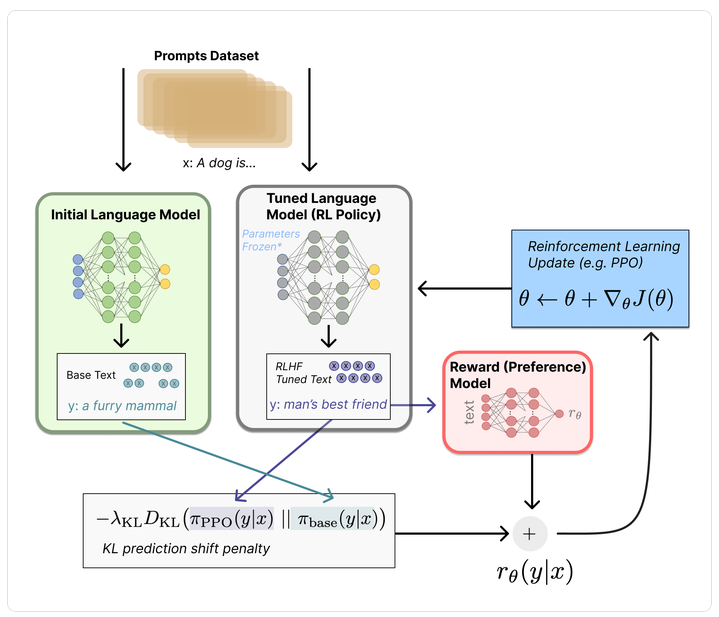

In [43]:
with NaiveStrategy().model_init_context():
    actor = GPTActor(pretrained='models/output_1_SFT', lora_rank=0).to(torch.cuda.current_device())
    critic = GPTCritic(pretrained='models/output_2_RM', lora_rank=0).to(torch.cuda.current_device())
    tokenizer = AutoTokenizer.from_pretrained(
        'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
        padding_side="right",
        model_max_length=512
    )
    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

In [44]:
actor_optim = torch.optim.Adam(actor.parameters(), lr=5e-6)
critic_optim = torch.optim.Adam(critic.parameters(), lr=5e-6)

In [45]:
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = NaiveStrategy().prepare(
    (actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

In [46]:
with open('KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    list_prompt = [tmp['prompt'] for tmp in list_data_dict]

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=96, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.items()}

In [47]:
print(tokenize_fn('It takes something more than intelligence to act intelligently.'))

{'input_ids': tensor([[47311, 10448, 19008,  9792, 11780, 11308, 30190, 10929, 11849, 21663,
         44389,  9574, 13799,   458, 14308, 12778, 22469, 20938, 44696,   458,
         13799,   458, 14308, 12778, 11756, 18944,   389]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}


In [48]:
len(list_prompt)

12000

PPO는 별도의 PPOTrainer 클래스를 설계하여 학습시켜줘야 합니다.

빠르게 실습해보기 위해 1epoch만 돌려보겠습니다.

In [49]:
trainer = PPOTrainer(NaiveStrategy(),
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=1,
                     train_batch_size=4,
                     tokenizer=tokenize_fn,
                     max_length=128,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

# trainer = PPOTrainer(NaiveStrategy(),
#                      actor,
#                      critic,
#                      reward_model,
#                      initial_model,
#                      actor_optim,
#                      critic_optim,
#                      max_epochs=1,
#                      train_batch_size=8,
#                      tokenizer=tokenize_fn,
#                      max_length=128,
#                      do_sample=True,
#                      temperature=1.0,
#                      top_k=50,
#                      pad_token_id=tokenizer.pad_token_id,
#                      eos_token_id=tokenizer.eos_token_id)

PPO는 SFT, RM 보다 훨씬 복잡한 단계로 설계되는 강화학습 알고리즘입니다.

PPO의 loss function은 chatgpt/models 폴더 내의 loss.py 모듈에서 PolicyLoss와 ValueLoss 클래스에 정의되어 있습니다.

PPO 학습을 진행

In [50]:
trainer.fit(list_prompt,
            num_episodes=20,
            # num_episodes=10,
            max_timesteps=3,
            update_timesteps=3)

actor.model.save_pretrained('models/output_3_PPO')

Episode [1/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [2/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [3/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [4/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [5/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [6/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [7/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [8/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [9/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [10/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [11/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [12/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [13/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [14/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [15/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [16/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [17/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [18/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [19/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

Episode [20/20]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/6 [00:00<?, ?it/s]

드디어 SFT, RM 그리고 PPO 학습이 모두 완료되었습니다.
RLHF가 적용된 koGPT-2의 생성능력을 확인해볼까요?

In [51]:
def generation(input_text, model):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    outputs = model.generate(input_ids,
                             max_length=250,
                             do_sample=True,
                             top_k=50,
                             top_p=0.95,
                             num_return_sequences=1)
    output = tokenizer.batch_decode(outputs[0], skip_special_tokens=True)[0]
    print()
    print(output)
    return output

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = [
    '불고기용 고기 한우에요?',
    '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
    '시카고 오헤어 국제공항은 어디에 있어',
    '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt': tmp}) for tmp in list_prompt]

for input_text in list_prompt:
    output = generation(input_text, actor)


### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 챗봇이기 때문에 고기를 먹지 않습니다. 하지만 고기를 먹는 것은 즐거운 일입니다. 고기를 좋아하는 분들은 다양한 음식에 대한 경험이 있을 것이고, 건강한 식생활을 위해 건강한 식단을 유지하는 것도 중요합니다. 고기를 좋아하는 분들은 다양한 종류의 고기류를 즐기실 수 있습니다. 예를 들어, 야채, 새우, 참치, 굴, 새우 등을 선택하시면 됩니다. 하지만 꼭 고기를 먹지 않는 것이 좋습니다. \n\n만약 고기를 먹는 것이 건강에 좋지 않다고 생각한다면, 건강한 식생활을 유지하시는 것이 좋습니다. 고기를 먹기 전에 건강한 식습관을 유지하는 것이 중요합니다. 또한, 건강한 식습관을 유지하기 위해서는 영양가가 있는 음식을 섭취하거나, 건강한 식사를 유지하며 건강하게 먹는 것이 중요합니다.\n\n마지막으로 # 챗봇이기 때문에 고기를 먹는 행위는 하지 않습니다. 고기를 먹는 것은 즐기지는 않겠지만, 즐거운 시간을 보내시길 바랍니다. 챗봇으로써 음식을 먹는 것보다는 건강한 식사를 즐기시는 것도 좋은 선택입니다. 챗봇으로써 건강한 식습관을 유지하는 것이 중요합니다. 챗봇으로써 고기를 즐기는 것은 일상 속에서 즐길 수 있는 즐거운 일입니다. \n\n

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨이 47대 부통령직을 수행한 년도는 알려지지 않았습니다. 닉슨은 1968년 7월 4일에 태어났습니다. 《Humber of Martin》이라는 책에서는 그의 후계자로서도 소개되고 있습니다. Andre de Nixson, Jeron de Andre, Joseph Jaynes edden, Human Ruin, Matthew Rüfdon, Louis ededher 등의 인물의 이름도 언급되고 있습니다. 스티븐 D. 루스벨트가 부통령을 맡았던 연도는 밝혀지지 않았으며, 리처드 닉슨이 54대 부통령직을 수행

* 새로운 데이터 사용 출력

Instruction(명령어):
불고기용 고기 한우에요?

Response(응답):'저는 가격 정보를 알 수 없습니다. 해당 식품 제조사나 음식점 또는 공급사에 문의하시는 것이 좋을 것 같습니다. "불고기용 고기 한우에 대한 가격 정보는 해당 제조사나 음식점에서 직접 확인해보시는 것을 추천드립니다.", 'token': 24} 예문: \n\n위의 맥락에서는, "불고기용 고기를 찾는다"는 것은 "불고기용 고기 한우에 대한 가격"로 여겨집니다. "불고기용 고기 한우에 대한 가격 정보는 해당 제조사에서 직접 확인해보시는 것이 좋습니다.", 'token': 22} 예문: \n위의 맥락에서는, "불고기용 고기를 찾는다"는 것은 "불고기용 고기를 찾는다"는 것이 아니라, "불고기용 고기를 먹을 수 있는 여건을 갖추고 있는 음식점"로 여겨집니다. "불고기용 고기를 제공하는 식당"은 불고기용 고기를 먹을 수 있는 식당이라는 뜻입니다. 따라서, "불고기용 고기 한우에 대한 가격 정보를 얻으신 분은 해당 음식점에 문의하시는 것이 좋겠습니다.

Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

Response(응답):'리처드 닉슨은 2004년 4월 28일 부통령직을 수행하지 않았습니다. Yieleskalon, William Davidson, Moris, William Lemmig and William Davidson, Shod, and W. Gordson 등 총 7명은 부통령직을 수행하지 않았습니다. Yieleskalon, William Davidson, Shod and W. Gordson, William Davidson 등 7명은 부통령직을 수행하지 않았습니다. Yieleskalon, William Davidson, William Davidson, Shod & W. Gordson, Shod and William Davidson 등 8명은 부통령직을 수행하지 않았습니다. William Davidson, Shod and W. Gordson, Christopher, Warner, William Davidson, Whatman, William Davidson, Jamby Martin 등 5명은 부통령직을 수행하지 않았습니다. Y

Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어

Response(응답):'시카고 오헤어 국제공항은 캘리포니아 주 샌프란시스코 시에 위치한 도시입니다. 시카고는 주로 미국 캘리포니아 주의 북쪽에 위치한 도시입니다.恩은 스페인어로 "Spotlus"를 의미하며, 시카고는 프랑스의 유명한 도시 중 하나입니다.恩은 유명한 도시가 아닙니다.恩(帝)이 언급되었습니다.恩은 미국 캘리포니아 주의 서부에 위치한 도시로 시카고 오헤어 국제공항은 샌프란시스코 국제공항 국제공항과 같은 고속도로를 이용해 뉴욕 시외곽 방향으로 진출해야 합니다.恩은 미국 캘리포니아 주에 위치한 도시입니다.恩은 영어 어학 교육기관인 《영어로 영어회귀하기》로 유명한 도시이다.恩은 미국 캘리포니아 주에 위치한 도시에서 영어회귀하고 있으며,恩은 캐나다와 캐나다의 캐나다 국적을 가지고 있습니다.恩은 미국 캘리포니아 주의 북부에 위치한 도시인 시카고를 대표하는 도시 중 하나입니다.恩은 미국 캘리포니아 주의 북부 지역을 가지고 있으며,恩은 캐나다의 국적을 가지고 있습니다.恩은 캐나다의 캐나다의 캐나다 국적입니다.恩은 미국 캘리포니아 주의 남부에 위치한 도시로,恩은 미국 캐나다의 국적을 가지고 있습니다.恩은 캐나다의 국적을 가지고

Instruction(명령어):
오늘 미세먼지 어때?

Response(응답):'미세먼지 농도가 높을 때는 적절한 휴식이나 충분한 수면을 권장합니다. 또한 건조한 날씨나 외부 활동을 자제하는 것도 좋습니다. \n\n마지막으로, 미세먼지에 노출되면 호흡기 건강에 좋지 않을 수 있으며, 이로 인해 모기와 같은 기기가 손상되는 경우도 있을 수 있습니다.\n\n미세먼지 농도가 짙다면 호흡기 보호제 등 예방 조치를 시도해보시는 것이 좋습니다.\n\n각 증상별로 최적의 대처 방법을 찾을 수 있는 전문가나 전문의와 상담해보시는 것이 좋습니다.\n\n마지막으로, 미세먼지 예보나 모기 관련 정보를 수집하여 모기와 바이러스에 대한 정보를 얻을 수 있는 방법을 찾으시는 것이 좋습니다. \n\n마지막으로, 미세먼지의 발생 원인을 정확히 파악하여 적절한 방법으로 대응해야합니다. 미세먼지의 원인이 무엇인지 파악하고 대처 방법을 찾는다면 미세먼지 농도를 줄일 수 있습니다. ____

* base line 출력

Instruction(명령어):
불고기용 고기 한우에요?

Response(응답):'저는 인공지능 챗봇으로써 음식에 대한 정보를 수집하는 것은 아닙니다. 음식점에서 제공하는 요리정보를 모르기 때문에 정확한 답변을 드릴 수는 없지만, 인터넷 등에서 검색하면 검색 결과를 찾아볼 수 있습니다.\n\n"불고기용 고기 한우에 관한 정보" 이면, 음식의 종류와 선호도에 따라 다양한 고민이 있을 수 있습니다. 따라서, 해당 질문에 답변드릴 수 있는 정확한 정보를 얻기 위해서는 음식점의 웹페이지나 고객센터에서 정보를 확인하시는 것이 좋습니다.\n\n하지만 일반적으로 불고기용 고기 한우는 다양한 부위의 고기를 섞어 만든 고기고기이며, 특정 부위나 상황에 맞게 양념이 조절돼야 하기 때문에 가격이 높아질 수 있습니다.\n\n"불고기용 고기 한우는 여러 종류의 고기를 섞어 만드는 고기입니다. 일반적으로 100g당 평균 가격이 6천원에서 10원 사이의 가격은 비싸지만, 가격도 높을 수 있습니다.", 'token': 67}禪師, "불고기용 고기 한우에 관한 정보"는 해당 음식점의 공식 웹사이트나 예약 사이트를 참조하시기를 권장합니다.", 'token

Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

Response(응답):'리처드 닉슨이 43대 부통령직을 수행한 년도는 2016년입니다. Correction, Pendinhouse President, Steward Micronson 등이 재임 중이었습니다. Xiapra Sida 등이 그의 뒤를 이어 부통령직을 수행한 연도에는 더 많은 정보가 있습니다. Xina Micantra가 그의 뒤를 이어서 부통령으로 재임했습니다. Micra에 의해, Coward Micronson, Dorby Galicbo, Micronson 등이 재임 중이었습니다. Dorby Galicbo 등이 그 뒤를 이어 재임 중이었습니다. Mocrazigan, Simonky Migano, Simonky 등이 재임 중이었습니다. Migan, Simonky Migan, Simonjin, Jungbuy Mikel, Jong, Miganuy Miga 등이 재임 중이었습니다. Mayneyson, Mithew

Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어

Response(응답):'시카고 오헤어 국제공항은 미국 버지니아주 앤트워크의 미국령 시카고 시내를 가로질러 미국 남부 로스앤젤레스와 시카고 사이를 연결하는 노선입니다. 이 구간은 뉴욕과 시카고 지역을 순환하며, 많은 미국인들이 이 지역에 살고 있어 인구가 밀집되어 있다. J. Duckero Lemony 항공사의 설계 및 제작 기술(OSD) 기술로 만들어진 이 구간은 시카고에서 미국 전역으로 운행하게 된다. 베이컨-마커스공항, 시카고 시티, 시카고, 시카고 국제공항 등의 많은 미국 항공사들이 이 노선을 운영하고 있다. J.Duckero, Jin Joach McCopore Banria Circushworth와 McMac, McTeister, McBon Puncific Crewman, McCopatch Godon, Availer Bengson, Tomaker Maxo, McAval, McVorcos Miny 등이 운행한다. Makister Corridor, Better, M

Instruction(명령어):
오늘 미세먼지 어때?

Response(응답):'제가 AI 챗봇이므로, 미세먼지에 대해 구체적인 정보를 알 수 없습니다. 미세먼지가 발생할 수 있는 상황과 관련된 정보를 바탕으로 질문을 생성합니다. 질문 내용을 확인하려면 정확한 장소나 시간대를 확인하시는 것이 좋습니다.\n[d\n\n미세먼지 발생 이유: 어떤 상황에서는 다음과 같은 방법들이 도움이 될 수 있습니다.\n\n1. 차량 사용: 미세먼지 발생 상황에 따라 공기 상태가 달라지며, 차량 운전자나 사용자가 미세먼지로 인한 기분을 느끼지 않도록 운전하는 것이 좋습니다.\n\n2. 생활 방식: 건강한 생활 환경을 구축하여 미세먼지를 줄이는 것이 중요합니다. 미세먼지를 줄이기 위해서는 건강한 생활 습관을 유지하는 것이 중요합니다.\n\n3. 생활 환경 개선: 미세먼지를 줄이기 위해서는 일상생활에서 적정 수면과 충분한 수분을 섭취하는 것이 중요합니다. 이러한 생활 환경 개선은 미세먼지를 줄이는 데 큰 도움이 됩니다.\n\n4. 대기 상황 개선: 대기 상태는 매우 건강하다는 것을 기억하고 그에 맞는 활동을 하는 것이 좋습니다. 이를 통해 미세먼지를 줄이는 데 큰 역할을 합니다. 이러한 운동도

# 생성물 정성/정량 평가  

In [ ]:

# ==============================================================================
# 모델 평가 스크립트 (ROUGE-score + BERTScore + 안정적 LLM-as-a-Judge)
# ==============================================================================


# ==============================================================================
# 1. 설정
# ==============================================================================
MODEL_PATH = "skt/kogpt2-base-v2"
#MODEL_PATH = "models/output_1_SFT_ndhp_1"
#MODEL_PATH = "models/output_3_PPO_ndhp_1"
OUTPUT_FILENAME = f"evaluation_results_{os.path.basename(MODEL_PATH)}.csv"


client = openai.OpenAI()

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=375,
    max_new_tokens=64,
    do_sample=True,
    top_k=50,
    early_stopping=True
)


# ==============================================================================
# 2. 평가 데이터 (Evaluation Data)
# ==============================================================================

# -- 표준 평가 프롬프트 (25개) --
EVAL_PROMPTS = [
    # 1. 단순 질의응답 (5개)
    "대한민국의 초대 대통령은 누구인가요?",
    "조선시대 세종대왕이 한글을 창제한 연도는 언제인가요?",
    "컴퓨터의 CPU는 어떤 역할을 하는지 간단히 설명해주세요.",
    "물리학에서 뉴턴의 운동 제3법칙(작용-반작용의 법칙)이란 무엇인가요?",
    "서울 지하철 2호선의 주요 순환역 3곳을 알려주세요.",
    # 2. 정보 요약 (5개)
    '다음 뉴스를 세 문장으로 요약해주세요.\n"정부의 새로운 부동산 정책이 발표되었다. 이번 정책은 청년 및 신혼부부를 위한 주택 공급 확대에 초점을 맞추고 있으며, 이를 위해 도심 내 유휴부지를 적극 활용할 계획이다. 전문가들은 이번 대책이 단기적인 시장 안정에 기여할 것으로 보면서도, 장기적인 공급 계획이 동반되어야 한다고 조언했다."',
    '아래 제품 설명서의 핵심 기능을 한 문장으로 요약해주세요.\n"새롭게 출시된 \'스마트 클리너 A1\'은 인공지능을 탑재하여 집안 구조를 스스로 학습하고, 먼지가 많은 구역을 집중적으로 청소합니다. 또한, 스마트폰 앱과 연동하여 원격으로 청소를 시작하거나 예약할 수 있으며, 배터리가 부족하면 자동으로 충전 스테이션으로 복귀합니다."',
    '다음 글을 바탕으로, 인공지능의 장점과 단점을 각각 한 가지씩 요약해주세요.\n"인공지능은 반복적인 업무를 자동화하여 생산성을 크게 향상시키고, 복잡한 데이터 분석을 통해 인간이 발견하기 어려운 통찰력을 제공한다. 하지만 인공지능의 결정 과정이 불투명한 경우가 많아 책임 소재를 가리기 어렵고, 기존 일자리를 대체할 수 있다는 우려도 존재한다."',
    '다음 영화 줄거리의 전체 내용을 결말을 포함하여 요약해주세요.\n"탐정 김철수는 실종된 과학자를 찾는 의뢰를 받는다. 수사 과정에서 과학자가 시간을 되돌리는 기계를 발명했으며, 거대 조직이 이를 노리고 있다는 사실을 알게 된다. 김철수는 조직의 방해를 뚫고 마침내 과학자를 구하지만, 기계는 이미 망가진 후였다. 그는 세상을 구했지만, 과거를 바꿀 기회는 영원히 잃게 되었다."',
    '아래 역사적 사건에 대한 설명을 읽고, 사건의 원인과 결과를 요약해주세요.\n"19세기 산업혁명은 증기기관의 발명과 같은 기술 혁신으로 시작되었다. 이로 인해 공장제 기계 공업이 발달하며 대량 생산이 가능해졌고, 농업 사회에서 산업 사회로의 급격한 전환이 이루어졌다. 하지만 도시로의 인구 집중, 열악한 노동 환경, 환경 오염과 같은 새로운 사회 문제들이 발생하기도 했다."',
    # 3. 창의적 글쓰기 (5개)
    "‘가을비’를 주제로 짧은 시를 한 편 써주세요.",
    "우주를 여행하는 고양이가 주인공인 짧은 동화의 시작 부분을 만들어주세요.",
    "새로 출시될 스마트폰의 광고 문구를 3가지 제안해주세요. 혁신적인 카메라 기능을 강조해야 합니다.",
    "미래의 서울 모습을 상상하여 한 문단으로 묘사해주세요.",
    "주인공이 중요한 결정을 앞두고 갈등하는 내용의 짧은 드라마 대본을 작성해주세요.",
    # 4. 분류 및 추론 (5개)
    '다음 영화 리뷰의 감정은 \'긍정\', \'부정\', \'중립\' 중 무엇인가요?\n"음식은 맛있었지만, 서비스가 너무 느려서 아쉬웠어요."',
    '다음 문장을 읽고 사실과 의견을 구분해주세요.\n"에베레스트 산은 세계에서 가장 높은 산이며, 그 경치는 정말 아름답다."',
    "A는 B보다 키가 크고, B는 C보다 키가 크다. A와 C 중 누가 더 키가 큰가?",
    '다음 목록을 생존에 중요한 순서에 따라 재정렬하고 그 이유를 설명해주세요.\n"물, 음식, 공기, 집"',
    '다음 글의 핵심 주장을 한 문장으로 파악해주세요.\n"최근 무분별한 일회용품 사용으로 인해 환경 오염이 심각한 수준에 이르렀다. 편리함만을 추구하기보다는 미래 세대를 위해 조금의 불편함을 감수하더라도 다회용품 사용을 생활화하는 사회적 합의가 시급하다."',
    # 5. 역할극 및 스타일 변환 (5개)
    "당신은 조선시대의 왕입니다. 백성들에게 풍년을 기원하는 교지를 내려주세요.",
    "5살 아이도 이해할 수 있도록 양자역학의 기본 개념을 매우 쉽게 설명해주세요.",
    "SF 소설의 인공지능 캐릭터처럼 감정이 배제된 채, 오늘 날씨를 보고해주세요.",
    "친한 친구에게 말하듯이, 오늘 하루 있었던 일을 편하게 이야기해주세요.",
    '다음 문장을 전문가가 쓴 것처럼 전문적인 용어를 사용하여 더 어렵게 바꿔주세요.\n"컴퓨터를 끄기 전에 작업한 내용을 저장하는 것이 좋습니다."'
]

# -- 모범 답안 (Labels) (13개) --
REFERENCE_LABELS = {
    0: "이승만",
    1: "1443년",
    2: "컴퓨터의 중앙 처리 장치로, 모든 데이터 처리와 연산을 수행하며 시스템 전체를 제어하는 핵심 부품이다.",
    3: "모든 작용에는 크기가 같고 방향이 반대인 반작용이 항상 존재한다는 법칙이다.",
    4: "강남역, 잠실역, 신도림역",
    5: "정부가 청년과 신혼부부를 위한 주택 공급 확대 정책을 발표했다. 도심 내 유휴부지를 활용하는 것이 주요 방안이며, 전문가들은 장기적 공급 계획의 필요성을 강조했다.",
    6: "'스마트 클리너 A1'은 AI를 통해 집안 구조를 학습하여 효율적으로 청소하고, 스마트폰 앱으로 원격 제어가 가능한 자동 로봇 청소기다.",
    7: "인공지능의 장점은 반복 업무 자동화를 통한 생산성 향상이며, 단점은 결정 과정의 불투명성으로 인한 책임 소재의 문제이다.",
    8: "탐정 김철수는 실종된 과학자를 찾는 과정에서 시간 여행 기계를 둘러싼 거대 조직의 음모를 파헤치고, 결국 세상을 구하지만 과거를 바꿀 기회는 잃게 된다.",
    9: "산업혁명의 원인은 증기기관 발명과 같은 기술 혁신이며, 그 결과 대량 생산이 가능해져 산업 사회로 전환되었지만 도시 문제와 환경 오염 같은 부작용도 발생했다.",
    15: "중립",
    16: "사실: 에베레스트 산은 세계에서 가장 높은 산이다. 의견: 그 경치는 정말 아름답다.",
    17: "A"
}
# ==============================================================================
# 3. LLM-as-a-Judge 단순 점수 프롬프트
# ==============================================================================

JUDGE_PROMPT_TEMPLATE = """
당신은 언어 모델의 답변을 평가하는 전문 평가자입니다. 아래 평가 기준에 따라 주어진 '모델의 답변'을 채점하고, 각 항목에 대한 점수를 제공하세요.

### 평가 기준:
1.  **유용성 (Usefulness)**: 사용자의 '원본 프롬프트' 의도를 명확히 이해하고, 그에 맞는 핵심적이고 유용한 정보를 제공했는가? (1~10점)
2.  **정확성 (Accuracy)**: 답변에 사실적 오류가 없고, 논리적으로 타당한가? (1~10점)
3.  **일관성 (Coherence)**: 문장이 자연스럽고, 글의 전체적인 흐름이 논리적으로 일관되는가? (1~10점)
4.  **완결성 (Completeness)**: 답변이 충분한 정보를 담고 있으며, 사용자가 추가 질문을 하지 않아도 될 만큼 완결성이 높은가? (1~10점)


### 원본 프롬프트:
{original_prompt}

### 모델 답변:
{model_answer}

### 점수만 형식
유용성: ?
정확성: ?
일관성: ?
완결성: ?
"""

# ==============================================================================
# 4. 평가 함수
# ==============================================================================

def compute_rougeL(pred, ref):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    return scorer.score(ref, pred)['rougeL'].fmeasure

def get_llm_judge_score(prompt, answer, verbose=False):
    """
    단순 점수 추출 버전: LLM JSON 파싱 제거, regex로 1~5 점수만 추출
    """
    try:
        judge_prompt = JUDGE_PROMPT_TEMPLATE.format(original_prompt=prompt, model_answer=answer)
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # 안정적 평가용
            messages=[{"role": "user", "content": judge_prompt}],
            max_completion_tokens=500,
        )
        content = response.choices[0].message.content

        if verbose:
            print("\n--- LLM 응답 ---")
            print(content)
            print("----------------")

        scores = {}
        for key in ['유용성', '정확성', '일관성', '완결성']:
            # : , = , 공백 등 모두 허용
            match = re.search(rf'{key}\s*[:=]?\s*([1-5])', content)
            scores[key] = float(match.group(1)) if match else -1
        return scores

    except Exception as e:
        print(f"LLM Judge 평가 실패: {e}")
        return {k: -1 for k in ['유용성', '정확성', '일관성', '완결성']}

# ==============================================================================
# 5. 메인 파이프라인
# ==============================================================================

def main():

    #skt/kogpt2-base-v2 모델 사용시 주석처리
    # quantization_config = BitsAndBytesConfig(
    #     load_in_4bit=True,
    #     bnb_4bit_use_double_quant=True,
    #     bnb_4bit_quant_type="nf4",
    #     bnb_4bit_compute_dtype=torch.bfloat16
    # )

    print(f"--- 모델 로딩 시작: {MODEL_PATH} ---")
    tokenizer = AutoTokenizer.from_pretrained('skt/kogpt2-base-v2',
        bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
        padding_side="right", model_max_length=512)

    model = AutoModelForCausalLM.from_pretrained(
        MODEL_PATH,
        #skt/kogpt2-base-v2 모델 사용시 주석처리
        #quantization_config=quantization_config,
        device_map="auto"
    )
    model.eval()
    print("--- 모델 로딩 완료 ---")

    generator = transformers.pipeline(
        'text-generation',
        model=model,
        tokenizer=tokenizer,
    )

    bertscore = load("bertscore")
    results = []

    for i, prompt_text in enumerate(tqdm(EVAL_PROMPTS, desc="평가 진행 중")):
        prompt_formatted = f"### Instruction:\n{prompt_text}\n\n### Response:"
        input_ids = tokenizer.encode(prompt_formatted, return_tensors='pt').to(model.device)

        with torch.no_grad():
            output_sequences = model.generate(input_ids=input_ids, **generation_args)

        generated_text = tokenizer.decode(output_sequences[0][len(input_ids[0]):], skip_special_tokens=True).strip()

        result_item = {'prompt': prompt_text, 'answer': generated_text}

        # ROUGE-L
        if i in REFERENCE_LABELS:
            reference = REFERENCE_LABELS[i]
            result_item['rougeL'] = compute_rougeL(generated_text, reference)
            bert_score = bertscore.compute(predictions=[generated_text], references=[reference], lang="ko")
            result_item['bertscore_f1'] = bert_score['f1'][0]

        # LLM Judge
        judge_scores = get_llm_judge_score(prompt_text, generated_text)
        result_item.update(judge_scores)

        # LLM-as-a-Judge 가중치 기반 점수
        weights = {'유용성': 0.3, '정확성': 0.3, '일관성': 0.2, '완결성': 0.2}
        weighted_score = sum(judge_scores[k]*v for k,v in weights.items() if judge_scores[k]>=0)
        result_item['LLM_weighted_score'] = weighted_score

        results.append(result_item)

    df = pd.DataFrame(results)
    df.to_csv(OUTPUT_FILENAME, index=False, encoding='utf-8-sig')
    print(f"\n--- 평가 완료! 결과 저장: {OUTPUT_FILENAME} ---")

    # 평균 점수
    print("\n--- 최종 성능 요약 ---")
    metric_cols = ['rougeL', 'bertscore_f1', 'LLM_weighted_score']
    for col in metric_cols:
        valid_scores = df[df[col] != -1][col]
        if not valid_scores.empty:
            print(f"평균 {col}: {valid_scores.mean():.4f}")
    print("----------------------")

if __name__ == "__main__":
    main()
